In [1]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

<h1> Linear Regression </h1>
<p> Working on Basic Linear Regression, and then branching out to Gradient Descent, Polynomial Regression</p>

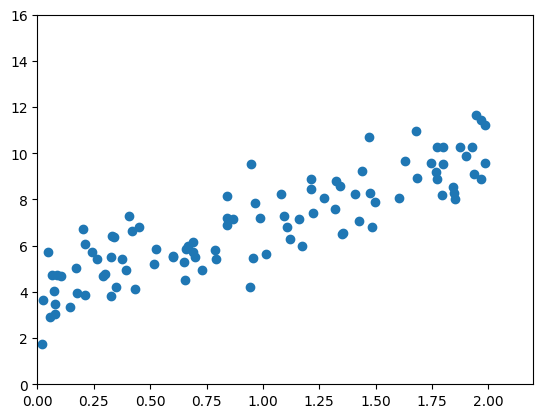

In [6]:
import matplotlib
import matplotlib.pyplot as plt

plt.scatter(X, y)
plt.axis([0, 2.2, 0, 16])
plt.show()

<p>add x0 = 1 for each instance</p>

In [7]:
X_b = np.c_[np.ones((100, 1)), X] 

<h3>Using the Normal Equation to find out Thetha that minimises MSE</h3>

In [8]:
thetha_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y) #Normal Equation

In [9]:
thetha_best

array([[3.99026914],
       [3.00923576]])

In [10]:
X_new = np.array([[0], [2]])
X_new

array([[0],
       [2]])

In [11]:
X_new_b = np.c_[np.ones((2, 1)), X_new]
X_new_b

array([[1., 0.],
       [1., 2.]])

In [12]:
y_predict = X_new_b.dot(thetha_best)
y_predict

array([[ 3.99026914],
       [10.00874066]])

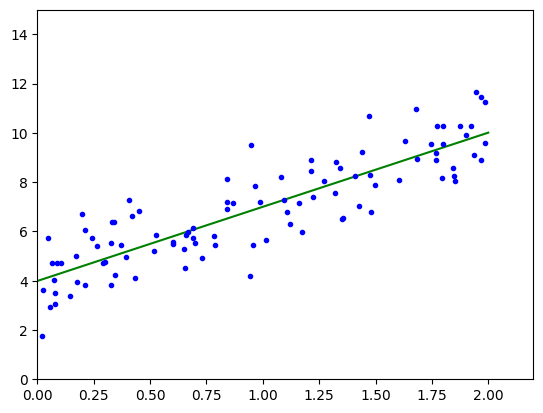

In [14]:
plt.plot(X_new, y_predict, "g-")
plt.plot(X, y, "b.")
plt.axis([0, 2.2, 0, 15])
plt.show()

<h3>Using a Sklearn Library</h3>

In [15]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
print(lin_reg.intercept_, lin_reg.coef_)
lin_reg.predict(X_new)

[3.99026914] [[3.00923576]]


array([[ 3.99026914],
       [10.00874066]])

<h3>Gradient Descent</h3>

In [16]:
import numpy as num
import random as rand

In [17]:
def gradientDescent(X, Y, theta, alpha, a, numIterations):
    Xtrans = X.transpose()
    for i in range(0, numIterations):
        hypothesis = num.dot(X, theta)
        loss = hypothesis - Y
 

        cst = num.sum(loss ** 2) / (2 * a)
        print("Iteration %d | Cost: %f" % (i, cst))
        gradient = num.dot(Xtrans, loss) / a
        theta = theta - alpha * gradient
    return theta

In [20]:
#X, y
a, b = num.shape(X)
numIterations= 50
alpha = 0.0004
theta = num.ones(b)
theta = gradientDescent(X, y, theta, alpha, a, numIterations)
print(theta)

Iteration 0 | Cost: 2007.236241
Iteration 1 | Cost: 1887.325108
Iteration 2 | Cost: 1885.648605
Iteration 3 | Cost: 1883.973866
Iteration 4 | Cost: 1882.300889
Iteration 5 | Cost: 1880.629673
Iteration 6 | Cost: 1878.960216
Iteration 7 | Cost: 1877.292517
Iteration 8 | Cost: 1875.626572
Iteration 9 | Cost: 1873.962381
Iteration 10 | Cost: 1872.299942
Iteration 11 | Cost: 1870.639252
Iteration 12 | Cost: 1868.980310
Iteration 13 | Cost: 1867.323114
Iteration 14 | Cost: 1865.667662
Iteration 15 | Cost: 1864.013953
Iteration 16 | Cost: 1862.361984
Iteration 17 | Cost: 1860.711753
Iteration 18 | Cost: 1859.063260
Iteration 19 | Cost: 1857.416502
Iteration 20 | Cost: 1855.771476
Iteration 21 | Cost: 1854.128183
Iteration 22 | Cost: 1852.486618
Iteration 23 | Cost: 1850.846782
Iteration 24 | Cost: 1849.208671
Iteration 25 | Cost: 1847.572285
Iteration 26 | Cost: 1845.937621
Iteration 27 | Cost: 1844.304677
Iteration 28 | Cost: 1842.673452
Iteration 29 | Cost: 1841.043943
Iteration 30 | Cost:

<p> we assume the weights to be 1 for everything. Using X, y as training dat with one feature</p>
<p>Using Gradient Descent, thetha is tried to become global minimum. The MSE cost function of lin regression is to be a convex function.</p>

<h3>Batch Gradient Descent</h3>

In [51]:
alpha = 0.01 #Learning Rate
n_iterations = 1000
m = 100

In [52]:
theta = np.random.randn(2, 1)
theta

array([[ 0.17502039],
       [-0.00984176]])

In [53]:
gradients = []
for i in range(n_iterations):
    gradient = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    gradients.append(gradient)
    theta = theta - alpha * gradient

In [54]:
theta

array([[3.97209525],
       [3.0246658 ]])

<p>What we found is similiar to the Normal Equation values of theta_0 and theta_1</p>

In [55]:
y_predict = X_new_b.dot(theta)
y_predict

array([[ 3.97209525],
       [10.02142684]])

Text(0.5, 1.0, 'Alpha 0.1')

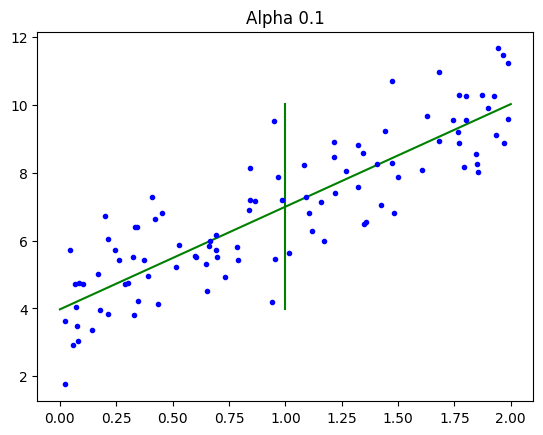

In [61]:
plt.plot(X_new_b, y_predict, "g-")
plt.plot(X, y, "b.")
plt.title("Alpha 0.1")

Text(0.5, 1.0, 'Alpha 0.02')

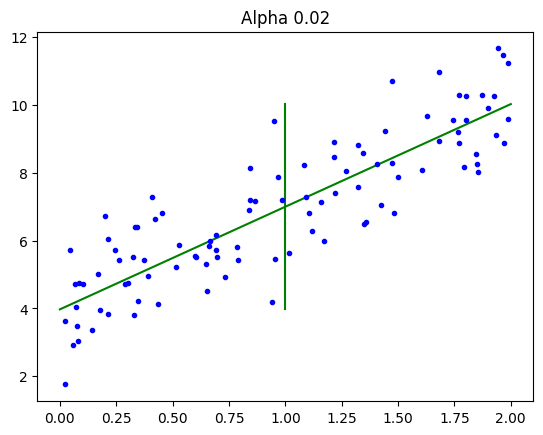

In [59]:
plt.plot(X_new_b, y_predict, "g-")
plt.plot(X, y, "b.")
plt.title("Alpha 0.02")

<h3>Stoicastic Gradient Descent</h3>
<p>
    Picks a random instance and based off that random instance it keeps calculating the gradient wrt that instance. Final Parameters are good but not optimal
</p>
<p>
    Part of Simulated annealing. Determines the learning rate after each iteration.
</p>

In [62]:
n_epochs = 50
t0, t1 = 5, 50

In [63]:
def learning_schedule(t):
    return t0/(t + t1)

In [64]:
theta = np.random.randn(2, 1) # random initialization
theta

array([[-0.18354647],
       [-0.70588336]])

In [65]:
m

100

In [67]:
gradients = []
thetas = []
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index: random_index+1]
        yi = y[random_index: random_index+1]
        gradient = 2 * xi.T.dot(xi.dot(theta) - yi)
        gradients.append(gradient)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradient
        thetas.append(theta)

In [68]:
gradients[:10]

[array([[-21.32456995],
        [-41.25673215]]),
 array([[-3.68528614],
        [-2.54838176]]),
 array([[-6.9422927 ],
        [-2.82605826]]),
 array([[2.14802372],
        [3.80276351]]),
 array([[-1.61585986],
        [-1.07889411]]),
 array([[1.32765898],
        [2.63786485]]),
 array([[-0.62391391],
        [-0.13192777]]),
 array([[1.35358048],
        [2.49729981]]),
 array([[-3.97926946],
        [-3.84692842]]),
 array([[-0.88082662],
        [-1.11958732]])]

In [69]:
thetas[:10]

[array([[1.94891053],
        [3.41978985]]),
 array([[2.31021309],
        [3.6696312 ]]),
 array([[2.97774123],
        [3.94136757]]),
 array([[2.77509749],
        [3.5826163 ]]),
 array([[2.92471414],
        [3.6825139 ]]),
 array([[2.80401787],
        [3.442708  ]]),
 array([[2.85972447],
        [3.45448727]]),
 array([[2.74098934],
        [3.23542588]]),
 array([[3.08402981],
        [3.56705764]]),
 array([[3.15867613],
        [3.66193792]])]

In [70]:
theta

array([[4.01938182],
       [2.9745825 ]])

In [72]:
thetas[0][0]

array([1.94891053])

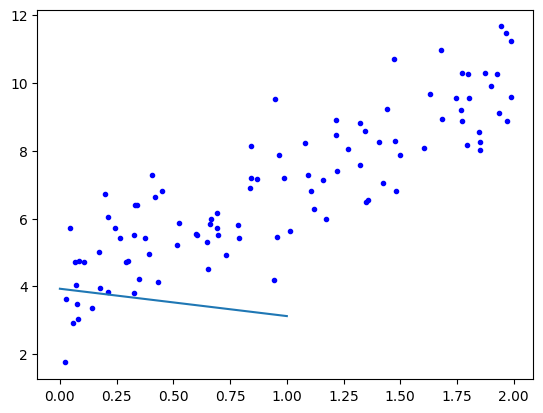

In [90]:
plt.plot(X, y, 'b.')
plt.plot(thetas[99])
#plt.axis([0, 2, 0, 15])
plt.show()

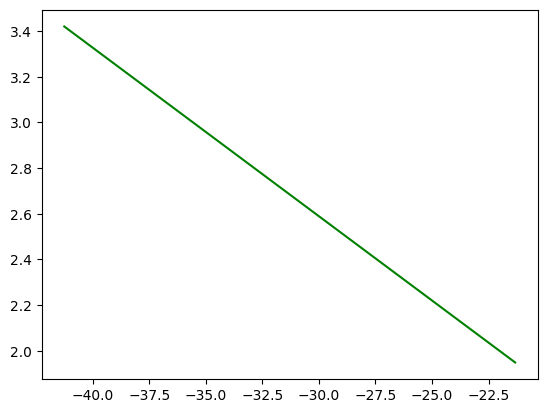

In [79]:
plt.plot(gradients[0], thetas[0],'g-')

<h4>Using SGD library from Sklearn to do Stoicastic Gradient Descent</h4>

In [94]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(penalty=None, alpha=0.1, max_iter=50)
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.1, max_iter=50, penalty=None)

In [95]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.69557538]), array([3.25844268]))

<p>Close but not the best, or optimised</p>

<h3>Mini-Batch Gradient Descent</h3>

<p>Computes Gradient Descent on small random sets. Performance boost from hardware optimization when used by GPUs</p>

<h1>Polynomial Regression</h1>
<p>data being more complex than a straight line.</p>

In [99]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

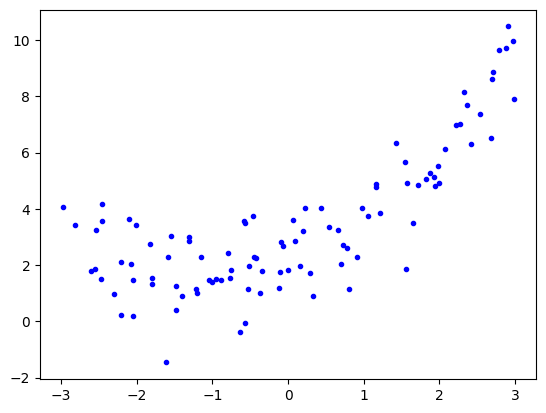

In [100]:
plt.plot(X, y, 'b.')
plt.show()

<p>Generated Non-linear and noisy data</p>
<p>Calling PolynomialFeatures function, giving it a degree = 2 of each feature in the training set as new features
PolynomialFeatures helps in extracting the values of X and X^2</p>

In [103]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X_poly[0]

array([0.33070984, 0.109369  ])

<p>X_poly contains original features of X and the square of the feature</p>

In [120]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
print(lin_reg.intercept_, lin_reg.coef_)
y_predict = lin_reg.predict(X_poly)

[2.09857208] [[0.99796739 0.47036669]]


In [111]:
print(y_predict[:10])

[[2.48005326]
 [5.47430341]
 [4.807988  ]
 [3.38858212]
 [1.57284272]
 [1.58300412]
 [2.27326101]
 [1.68069   ]
 [2.00860649]
 [1.82260919]]


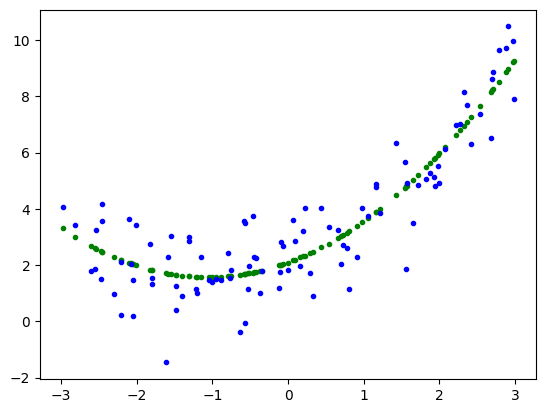

In [126]:
plt.plot(X, y_predict, "g.")
plt.plot(X, y, "b.")
plt.show()

<p>0.47 and 0.99 are close to 0.5 and 1.0</p>

<h1>Learning Curves</h1>
<p>Fitting higher degree polynomials into linear regression</p>

In [128]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [137]:
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)  
    plt.xlabel("Training set size", fontsize=14) 
    plt.ylabel("RMSE", fontsize=14)      

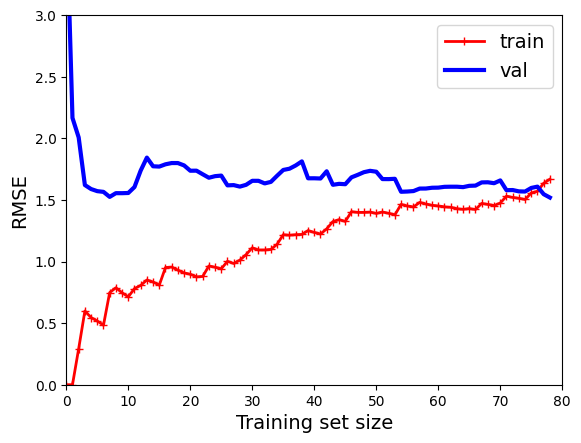

In [140]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])                          
plt.show()            

<p>Plotting a 10th degree polynomial</p>

In [142]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline((
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("sdg_reg", LinearRegression()),
))

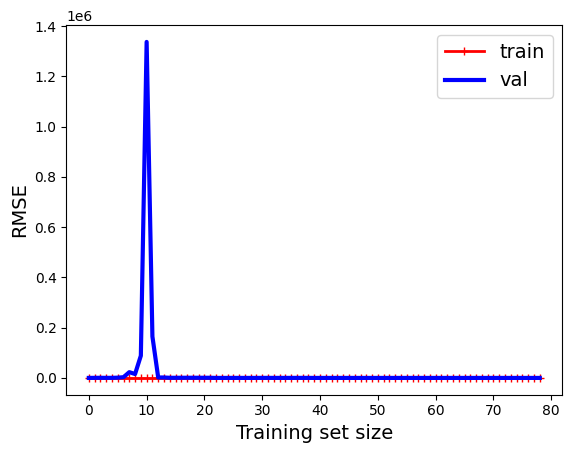

In [143]:
plot_learning_curves(polynomial_regression, X, y)

<h1>Regularization Linear Models</h1>
<h3>Ridge Regression</h3>
<p>Easier to reduce overfitting, regularize the model</p>
<p>The hyperparameter Alpha controls the regularization model. if Alpha is too small, or Alpha = 0 then it's a linear regression model. If Alpha is too large, the weights end up being close to 0.</p>

In [144]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)

Ridge(alpha=1, solver='cholesky')

In [145]:
ridge_reg.predict([[1.5]])

array([[5.06842052]])

In [146]:
sgd_reg = SGDRegressor(penalty='l2')
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([5.05862374])

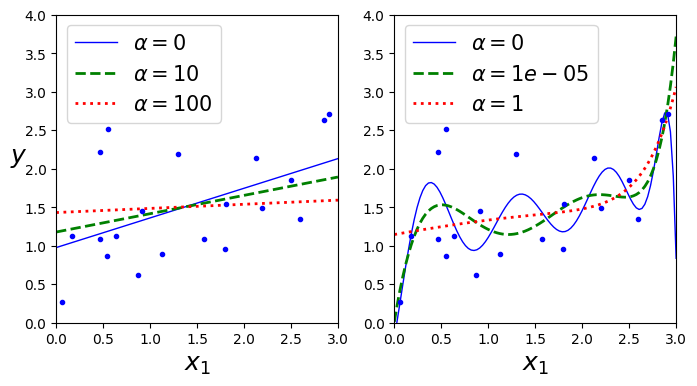

In [148]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)

plt.show()

<p>Model Plotted above is for Ridge Regression</p>

<h3>Lasso Regression</h3>
<p>Tends to completely eliminate weights of the least important features. Automatically performs feature selection and outputs a sparse model</p>

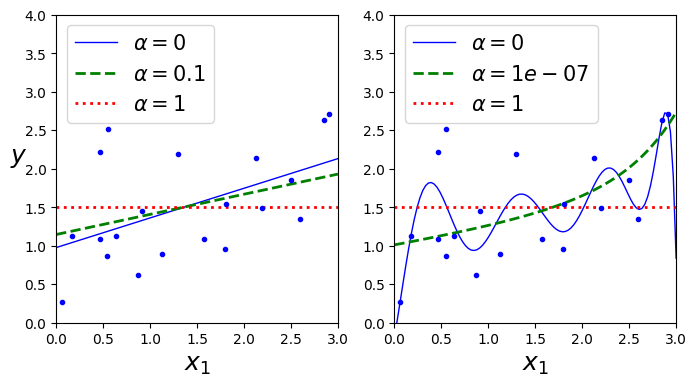

In [149]:
from sklearn.linear_model import Lasso

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), tol=1, random_state=42)

plt.show()

In [152]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.53788174])

<h3>Elastic Net</h3>
<p>Middle ground between Ridge and Lasso Regression. Regularization terms is a mix of both ridge and lasso</p>

In [158]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X,y)

ElasticNet(alpha=0.1)

In [159]:
elastic_net.predict([[1.5]])

array([4.78114505])

<h3>Early Stopping</h3>
<p>To Stop training as soon as the validation error reaches the minimum</p>

In [161]:
from sklearn.base import clone

sgd_reg = SGDRegressor(max_iter=1, warm_start=True, penalty=None, 
                       learning_rate="constant", eta0=0.0005)

In [162]:
minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val_predict, y_val)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

/Users/chrisdemta/Documents/Machine Learning from scratch/env/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:1575: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/chrisdemta/Documents/Machine Learning from scratch/env/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:1575: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/chrisdemta/Documents/Machine Learning from scratch/env/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:1575: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/chrisdemta/Documents/Machine Learning from scratch/env/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:1575: Conver

<h1>Logistic Regression</h1>
<p>Estimates the probability that an instance belongs to a particular class or not</p>
<h3>Estimating Probabilities</h3>

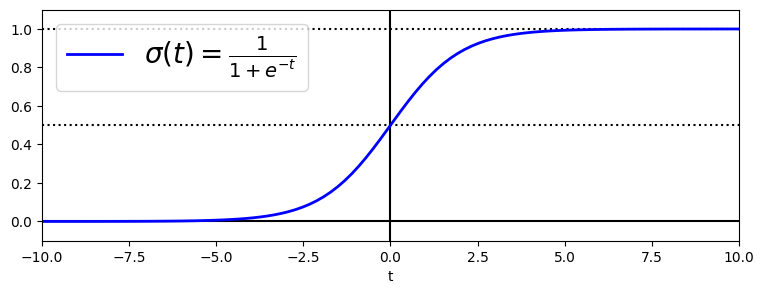

In [169]:
t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])
plt.show()

<h3>Decision Boundary</h3>
<p>Incorporating the Iris Dataset</p>

In [170]:
from sklearn import datasets
iris = datasets.load_iris()

In [172]:
type(iris)

sklearn.utils._bunch.Bunch

In [173]:
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [176]:
X = iris["data"][:,3:] #petal width
X[:5]

array([[0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.2]])

In [180]:
y = (iris["target"] == 2).astype(np.int_)

In [182]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

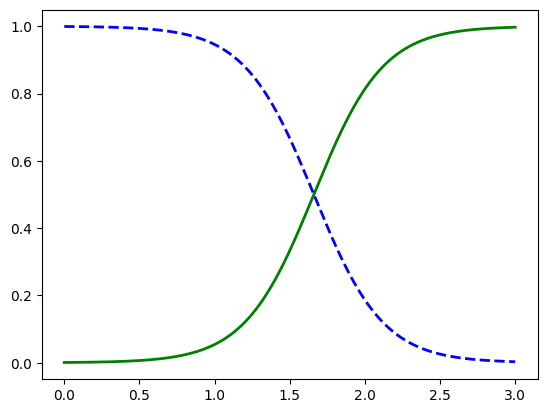

In [183]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")

In [187]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

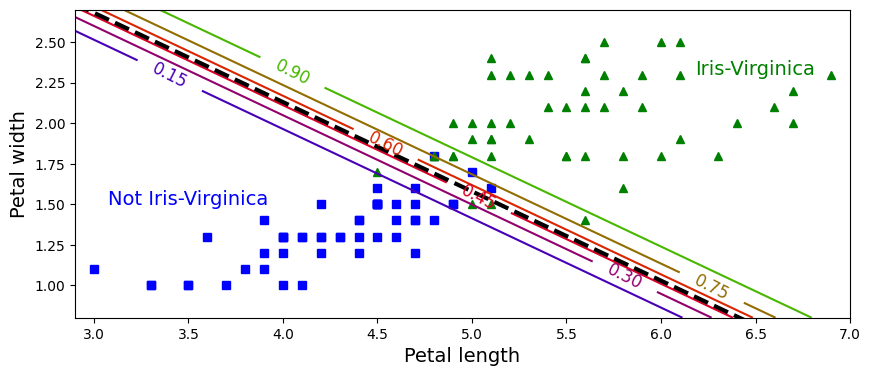

In [190]:
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int_)

log_reg = LogisticRegression(solver="liblinear", C=10**10, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris-Virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris-Virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
plt.show()

In [191]:
softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs",
                                 C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial')

In [192]:
softmax_reg.predict([[5, 2]])

array([1])

In [193]:
softmax_reg.predict_proba([[5, 2]])

array([[0.04687836, 0.95312164]])

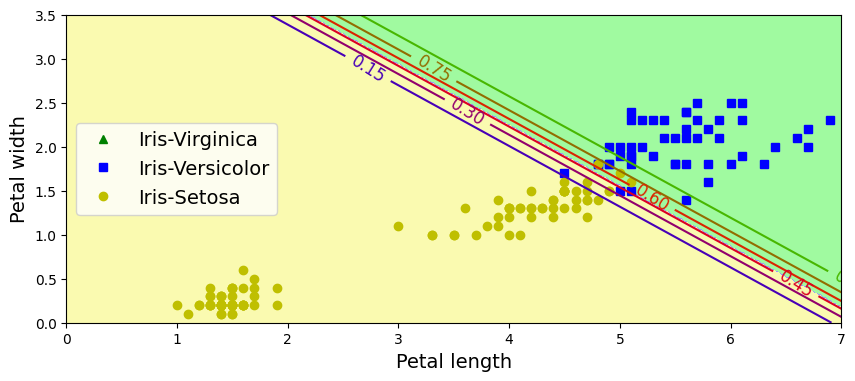

In [195]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-Virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris-Versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()